### HW1： 

### import libraries

In [66]:
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Cleaning the texts
import re
import nltk
nltk.download('stopwords') # dictionary contains all stopping words
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mengh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
econ_path = 'C:/Users/mengh/Dropbox/FRE-7871-News-Analytics-and-Machine-Learning/HW1/economist/'
onion_path = 'C:/Users/mengh/Dropbox/FRE-7871-News-Analytics-and-Machine-Learning/HW1/onion/'

def data_preparation(path, class_name):

    # Create Dictionary for File Name and Text
    file_name_and_text = {}
    
    if class_name == 'econ':
        sub_path_names = os.listdir(path)

        for sub_path in sub_path_names:
            file_names = os.listdir(path+sub_path)
            for file in file_names:
                if file.endswith(".txt"):
                    with open(path + sub_path + '/'+ file, "r") as target_file:
                         file_name_and_text[file] = target_file.read()
    else:
        file_names = os.listdir(path)

        for file in file_names:
            if file.endswith(".txt"):
                with open(path + file, "r") as target_file:
                     file_name_and_text[file] = target_file.read()

    file_data = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
                 .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))
    file_data['class'] = class_name
    return file_data

def data_generate_label(econ_df, onion_df):
    df =  pd.concat([econ_df, onion_df], ignore_index=True)
    le = LabelEncoder()
    df['class'] = le.fit_transform(df['class'])
    df = df.astype({'class': int})
    
    return df 

econ_df = data_preparation(econ_path, 'econ')
onion_df = data_preparation(onion_path, 'onion')
article_df = data_generate_label(econ_df, onion_df)
article_df.head()

,file_name,text,class
0,africa.1.txt,\n ...,0
1,africa.10.txt,\n ...,0
2,africa.11.txt,\n The Kurds say they still want more of it ...,0
3,africa.12.txt,\n A politician who paid the price for telli...,0
4,africa.13.txt,\n President Mwai Kibaki is loth to back dow...,0


In [65]:
def data_cleaning(article_df):
    corpus = [] # bag of words
    
    for index, row in article_df.iterrows():
        article = re.sub('[^a-zA-Z]', ' ', row['text']) # keep only letters
        article = article.lower() # lower case 
        article = article.split() # string to list 
        ps = PorterStemmer() # sstemmed

        article = [ps.stem(word) for word in article if not word in set(stopwords.words('english'))] # if not stopping word, reserve word 
        article = ' '.join(article) # list to string 
        corpus.append(article)
        
        if (index+1) % 50 == 0:
            print('{} articles cleaned...'.format(index+1))
    print('complete.') 
    return corpus

corpus = data_cleaning(article_df)

50 articles cleaned...
100 articles cleaned...
150 articles cleaned...
200 articles cleaned...
250 articles cleaned...
300 articles cleaned...
350 articles cleaned...
400 articles cleaned...
450 articles cleaned...
500 articles cleaned...
550 articles cleaned...
600 articles cleaned...
650 articles cleaned...
700 articles cleaned...
complete.


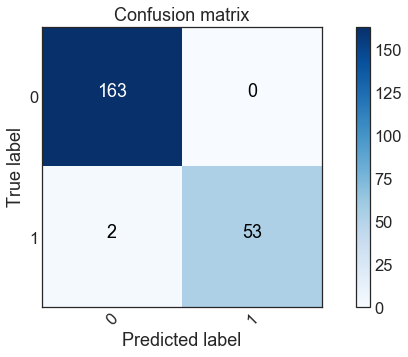

In [68]:
def nlp_model(corpus, article_df):
    cv = CountVectorizer(max_features = 11000)
    X = cv.fit_transform(corpus).toarray()
    y = article_df.loc[:, 'class'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_test, y_pred

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    '''
    This function is to plot a nice confusion matrix.
    inputs:
    cm: confusion matrix calculated by sklearn 
    '''
    plt.rcParams['figure.figsize'] = (10, 5)
    sns.set_context('notebook', font_scale=1.5)
    plt.style.use('seaborn-white')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
y_test, y_pred = nlp_model(corpus, article_df)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title='Confusion matrix')